In [1]:
library(forecast)
library(car)
library(ggplot2)
#library(zoo)
library(scales)
library(repr)

options(scipen=999)

# Change plot size to 10 x 6
options(repr.plot.width=8, repr.plot.height=5)

jp_data <- read.csv2("japan_employment.csv")
#Remove last row, 2015-01
jp_data <- jp_data[1:nrow(jp_data) - 1,]
jp_data$Date <- as.Date(jp_data$Date, format = "%Y-%m-%d")
#Create column with month value
jp_data$Month <- sapply(jp_data$Date, function(x) {format(as.Date(x), "%m")})
#jp_observed_ts <- zoo(jp_data)

head(jp_data)

Warning message:
: package 'forecast' was built under R version 3.2.5Loading required package: zoo
Warning message:
: package 'zoo' was built under R version 3.2.5
Attaching package: 'zoo'

The following objects are masked from 'package:base':

    as.Date, as.Date.numeric

Loading required package: timeDate
Warning message:
: package 'timeDate' was built under R version 3.2.3This is forecast 7.1 

Warning message:
: package 'car' was built under R version 3.2.5Warning message:
: package 'ggplot2' was built under R version 3.2.5Warning message:
: package 'scales' was built under R version 3.2.5

,Date,Value,Month
1,2002-01-01,67.70215,01
2,2002-02-01,67.55654,02
3,2002-03-01,67.91463,03
4,2002-04-01,68.32146,04
5,2002-05-01,68.32711,05
6,2002-06-01,68.58675,06


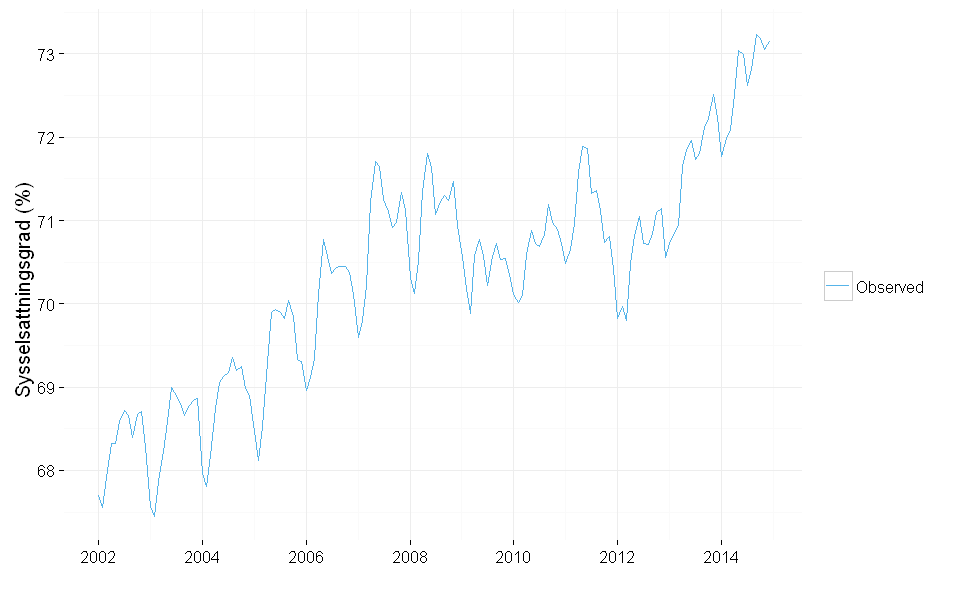

In [2]:
ggplot(jp_data, aes()) +
  geom_line(aes(x = Date, y = Value, color="Observed")) +
  scale_colour_manual(name="", values=c(Observed="#56B4E9")) +
  theme_bw() +
  theme(plot.background = element_blank(), 
    panel.border = element_blank(),
    axis.line = element_line(color = 'black'),
    panel.grid.major.x = element_line(colour = "grey93"),
    panel.grid.major.y = element_line(colour = "grey93"),
    axis.title.y = element_text(hjust = 0.45, vjust = 1.05)) +
  ylab("Sysselsattningsgrad (%)") +
  xlab("")

Säsongsrensa före trendanalys


In [3]:
jp_ts <- ts(jp_data$Value, start = 2002, frequency = 12)
jp_data$Seasonal_comp <- decompose(jp_ts, "additive")$seasonal
jp_data$Dt <- jp_data$Value - as.numeric(jp_data$Seasonal_comp)

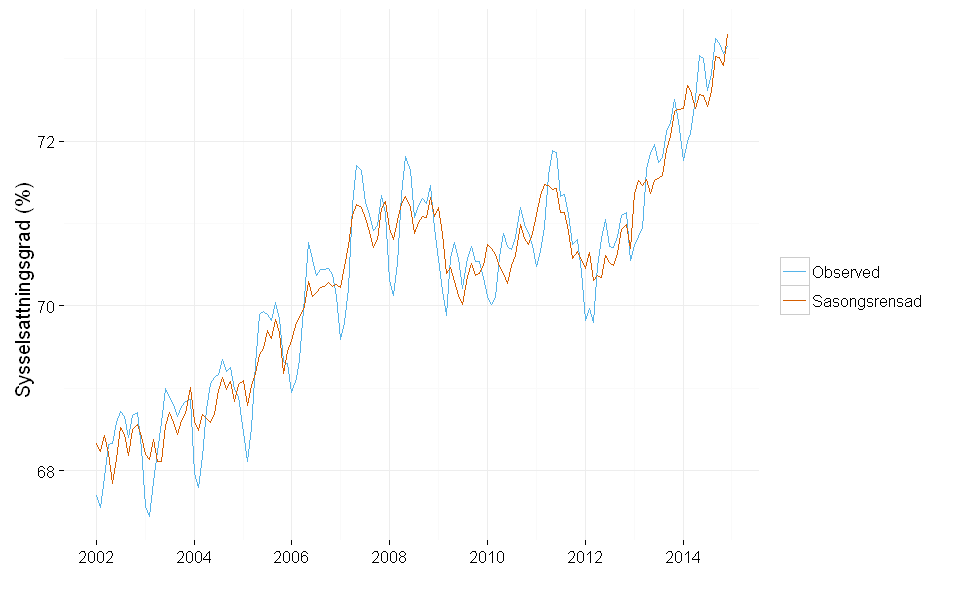

In [4]:
ggplot(jp_data, aes()) +
  geom_line(aes(x = Date, y = Value, color="Observed")) +
  geom_line(aes(x = Date, y = Dt, color="Sasongsrensad")) +
  scale_colour_manual(name="", values=c(Observed="#56B4E9", Sasongsrensad="#D55E00")) +
  theme_bw() +
  theme(plot.background = element_blank(), 
    panel.border = element_blank(),
    axis.line = element_line(color = 'black'),
    panel.grid.major.x = element_line(colour = "grey93"),
    panel.grid.major.y = element_line(colour = "grey93"),
    axis.title.y = element_text(hjust = 0.45, vjust = 1.05)) +
  ylab("Sysselsattningsgrad (%)") +
  xlab("")

Testa anpassa polynom 3/5


Call:
lm(formula = jp_data$Dt ~ poly(index(jp_data), 3, raw = TRUE))

Residuals:
     Min       1Q   Median       3Q      Max 
-0.90811 -0.35031 -0.02921  0.39031  0.95538 

Coefficients:
                                          Estimate    Std. Error t value
(Intercept)                          67.3400160957  0.1540860558 437.029
poly(index(jp_data), 3, raw = TRUE)1  0.0895968881  0.0084724017  10.575
poly(index(jp_data), 3, raw = TRUE)2 -0.0009188962  0.0001251811  -7.341
poly(index(jp_data), 3, raw = TRUE)3  0.0000036199  0.0000005242   6.905
                                                 Pr(>|t|)    
(Intercept)                          < 0.0000000000000002 ***
poly(index(jp_data), 3, raw = TRUE)1 < 0.0000000000000002 ***
poly(index(jp_data), 3, raw = TRUE)2       0.000000000012 ***
poly(index(jp_data), 3, raw = TRUE)3       0.000000000128 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.4696 on 152 degrees of freedom
Multiple R

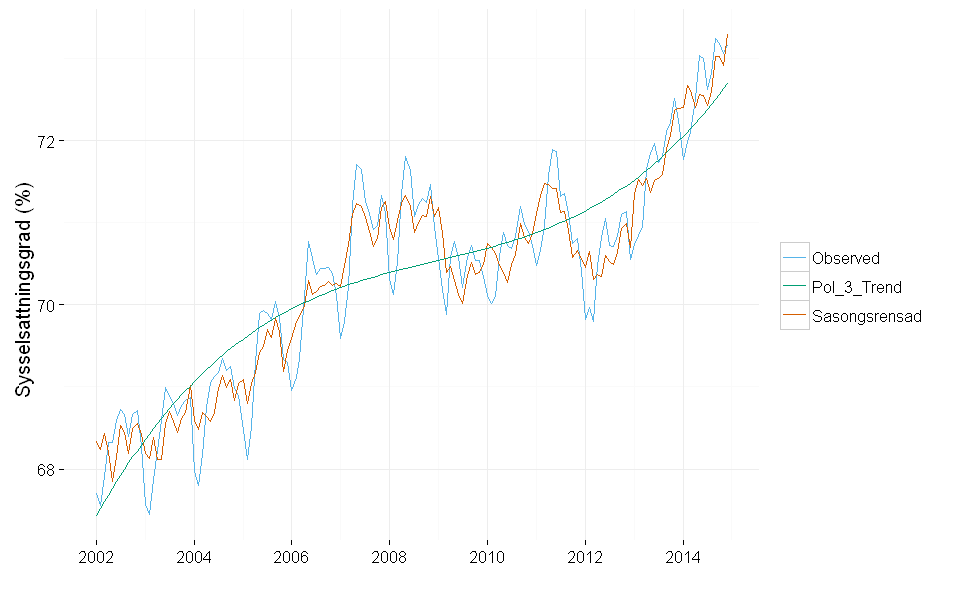

In [5]:
jp_pol_3_model <- lm(jp_data$Dt ~ poly(index(jp_data), 3, raw = TRUE))
summary(jp_pol_3_model)
jp_data$Pol_3_Fit <- jp_pol_3_model$fitted

ggplot(jp_data, aes()) +
  geom_line(aes(x = Date, y = Value, color="Observed")) +
  geom_line(aes(x = Date, y = Dt, color="Sasongsrensad")) +
  geom_line(aes(x = Date, y = Pol_3_Fit, color="Pol_3_Trend")) +
  scale_colour_manual(name="", values=c(Observed="#56B4E9", Pol_3_Trend="#009E73", Sasongsrensad="#D55E00" )) +
  theme_bw() +
  theme(plot.background = element_blank(), 
    panel.border = element_blank(),
    axis.line = element_line(color = 'black'),
    panel.grid.major.x = element_line(colour = "grey93"),
    panel.grid.major.y = element_line(colour = "grey93"),
    axis.title.y = element_text(hjust = 0.45, vjust = 1.05)) +
  ylab("Sysselsattningsgrad (%)") +
  xlab("")



Call:
lm(formula = jp_data$Dt ~ poly(index(jp_data), 5, raw = TRUE))

Residuals:
     Min       1Q   Median       3Q      Max 
-0.81020 -0.19660 -0.02833  0.21994  0.76122 

Coefficients:
                                             Estimate       Std. Error t value
(Intercept)                          68.6469477494221  0.1645325680222 417.224
poly(index(jp_data), 5, raw = TRUE)1 -0.0868693665608  0.0209391272015  -4.149
poly(index(jp_data), 5, raw = TRUE)2  0.0048066183862  0.0008198998599   5.862
poly(index(jp_data), 5, raw = TRUE)3 -0.0000669760906  0.0000131932623  -5.077
poly(index(jp_data), 5, raw = TRUE)4  0.0000003585991  0.0000000925209   3.876
poly(index(jp_data), 5, raw = TRUE)5 -0.0000000006143  0.0000000002346  -2.619
                                                 Pr(>|t|)    
(Intercept)                          < 0.0000000000000002 ***
poly(index(jp_data), 5, raw = TRUE)1          0.000055809 ***
poly(index(jp_data), 5, raw = TRUE)2          0.000000028 ***
poly(index

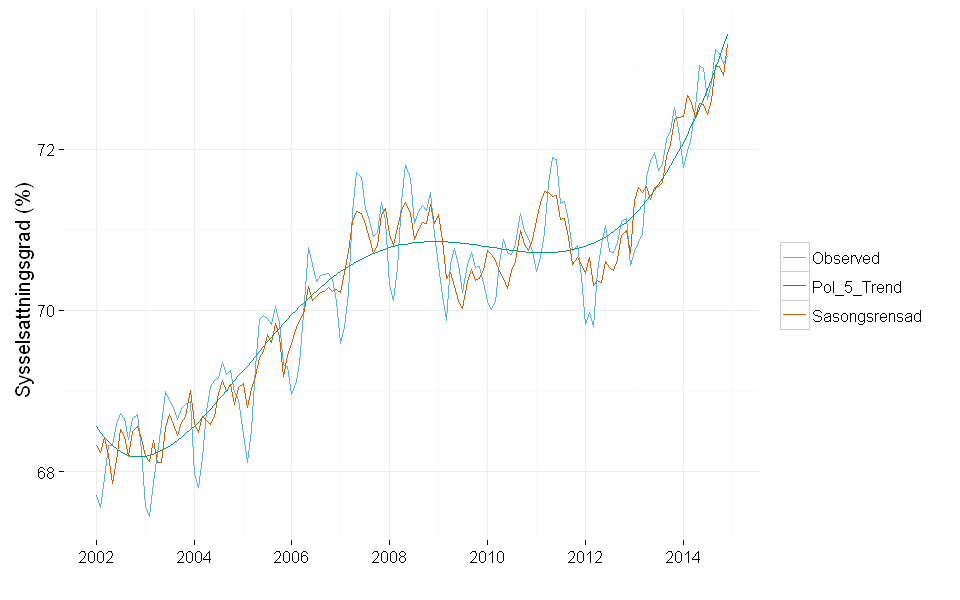

In [6]:
jp_pol_5_model <- lm(jp_data$Dt ~ poly(index(jp_data), 5, raw = TRUE))
summary(jp_pol_5_model)
jp_data$Pol_5_Fit <- jp_pol_5_model$fitted


ggplot(jp_data, aes()) +
  geom_line(aes(x = Date, y = Value, color="Observed")) +
  geom_line(aes(x = Date, y = Dt, color="Sasongsrensad")) +
  geom_line(aes(x = Date, y = Pol_5_Fit, color="Pol_5_Trend")) +
  scale_colour_manual(name="", values=c(Observed="#56B4E9", Pol_5_Trend="#009E73", Sasongsrensad="#D55E00" )) +
  theme_bw() +
  theme(plot.background = element_blank(), 
    panel.border = element_blank(),
    axis.line = element_line(color = 'black'),
    panel.grid.major.x = element_line(colour = "grey93"),
    panel.grid.major.y = element_line(colour = "grey93"),
    axis.title.y = element_text(hjust = 0.45, vjust = 1.05)) +
  ylab("Sysselsattningsgrad (%)") +
  xlab("")



Residualanalys på 5

[1] 0.4055594

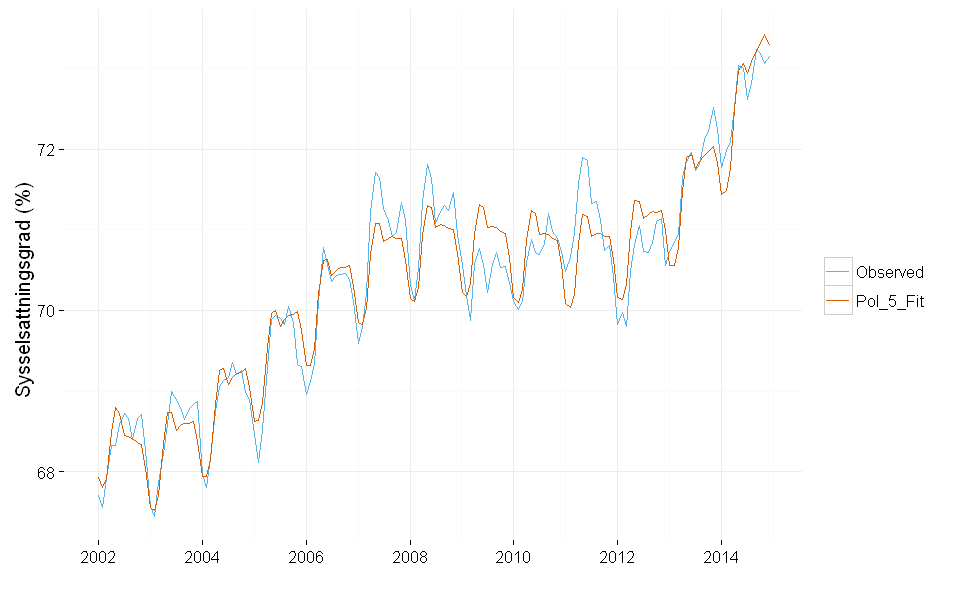

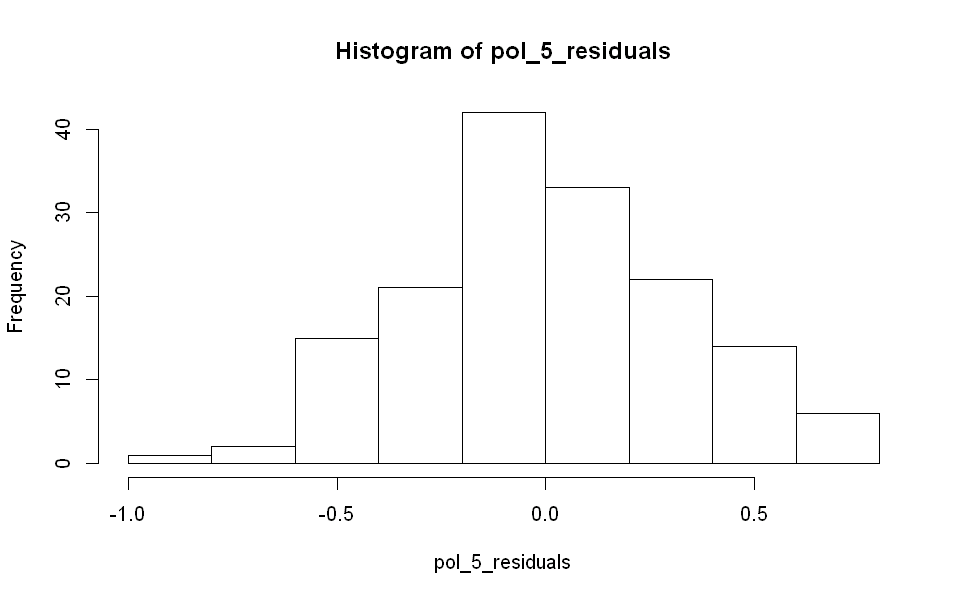

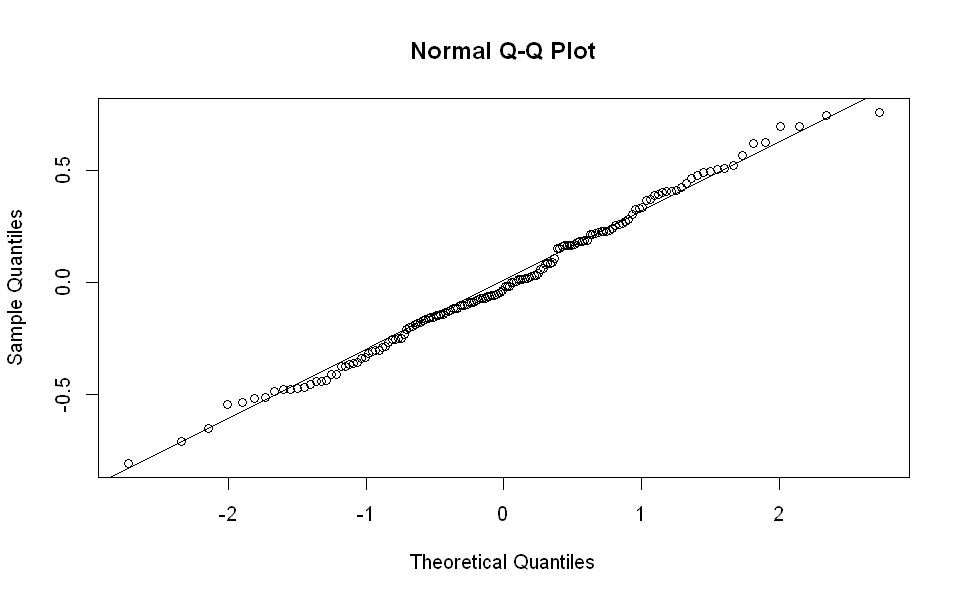

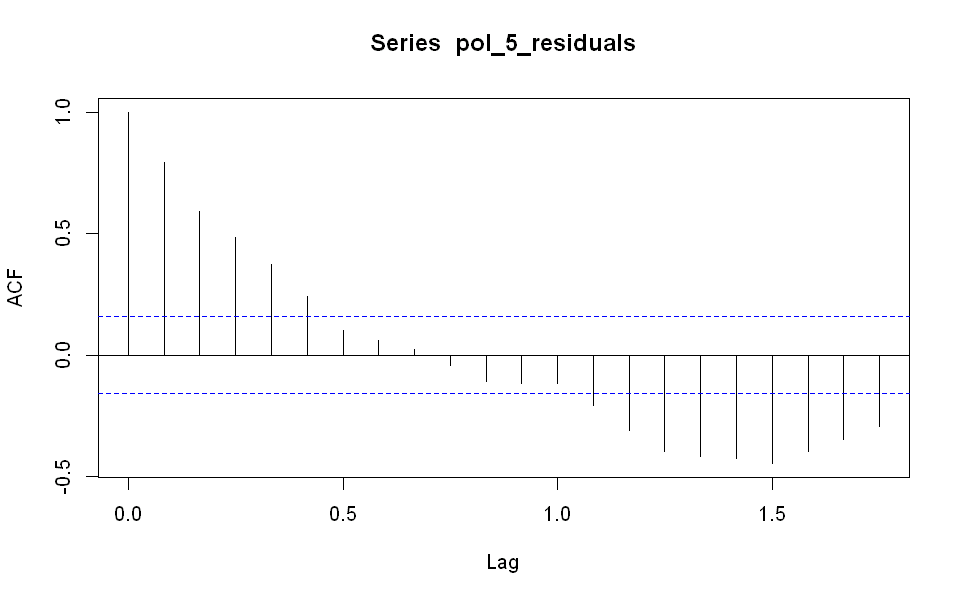

In [7]:
pol_5_residuals <- jp_data$Value - (jp_data$Pol_5_Fit + jp_data$Seasonal_comp)
durbinWatsonTest(as.numeric(pol_5_residuals))


temp_data <- data.frame(Date = jp_data$Date, Value = jp_data$Value, Fitted = (jp_data$Pol_5_Fit + jp_data$Seasonal_comp))

ggplot(temp_data, aes()) +
  geom_line(aes(x = Date, y = Value, color="Observed")) +
  geom_line(aes(x = Date, y = Fitted, color="Pol_5_Fit")) +
  scale_colour_manual(name="", values=c(Observed="#56B4E9", Pol_5_Fit="#D55E00")) +
  theme_bw() +
  theme(plot.background = element_blank(), 
    panel.border = element_blank(),
    axis.line = element_line(color = 'black'),
    panel.grid.major.x = element_line(colour = "grey93"),
    panel.grid.major.y = element_line(colour = "grey93"),
    axis.title.y = element_text(hjust = 0.45, vjust = 1.05)) +
  ylab("Sysselsattningsgrad (%)") +
  xlab("")


hist(pol_5_residuals)
qqnorm(pol_5_residuals)
qqline(pol_5_residuals)
acf(pol_5_residuals)

Holt


Forecast method: Holt's method

Model Information:
Holt's method 

Call:
 holt(x = jp_data$Dt, h = 12, alpha = 0.95, beta = 0.15, gamma = FALSE) 

  Smoothing parameters:
    alpha = 0.95 
    beta  = 0.15 

  Initial states:
    l = 68.3318 
    b = -0.0051 

  sigma:  0.2146

     AIC     AICc      BIC 
311.6637 311.7422 317.7634 

Error measures:
                      ME      RMSE       MAE         MPE      MAPE     MASE
Training set 0.004858546 0.2146329 0.1755856 0.006644752 0.2499551 1.029205
                     ACF1
Training set -0.002086481

Forecasts:
    Point Forecast    Lo 80    Hi 80    Lo 95    Hi 95
157       73.38989 73.11482 73.66495 72.96921 73.81056
158       73.49845 73.05814 73.93877 72.82505 74.17186
159       73.60702 73.02206 74.19197 72.71241 74.50163
160       73.71558 72.99174 74.43942 72.60856 74.82260
161       73.82415 72.96240 74.68589 72.50622 75.14207
162       73.93271 72.93194 74.93348 72.40216 75.46326
163       74.04128 72.89927 75.18328 72.29472 

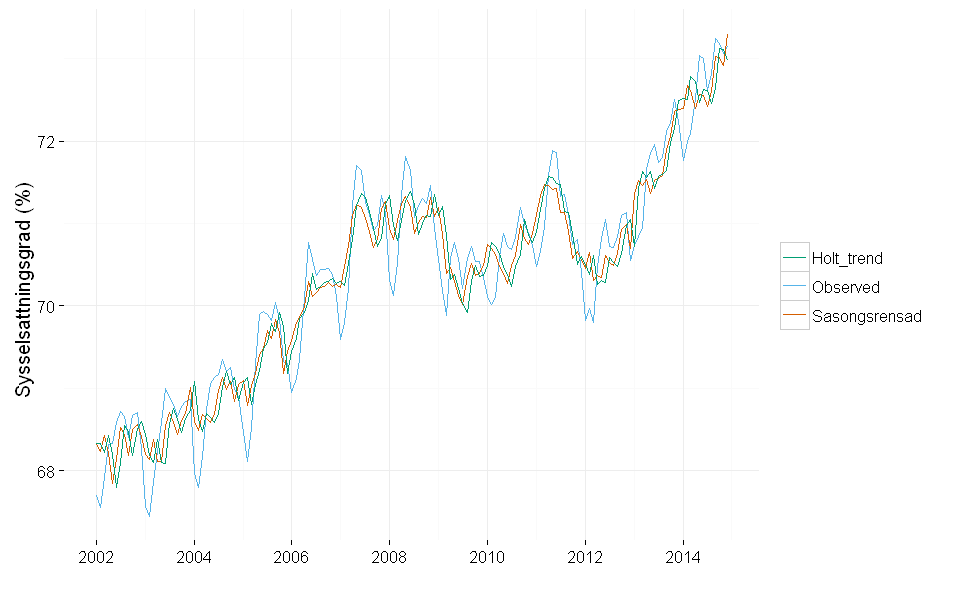

In [8]:
jp_holt_model <- holt(jp_data$Dt, h=12, alpha = 0.95, beta = 0.15, gamma = FALSE)
summary(jp_holt_model)
jp_data$Holt_Fit <- as.numeric(jp_holt_model$fit)

ggplot(jp_data, aes()) +
  geom_line(aes(x = Date, y = Value, color="Observed")) +
  geom_line(aes(x = Date, y = Dt, color="Sasongsrensad")) +
  geom_line(aes(x = Date, y = Holt_Fit, color="Holt_trend")) +
  scale_colour_manual(name="", values=c(Observed="#56B4E9", Holt_trend="#009E73", Sasongsrensad="#D55E00" )) +
  theme_bw() +
  theme(plot.background = element_blank(), 
    panel.border = element_blank(),
    axis.line = element_line(color = 'black'),
    panel.grid.major.x = element_line(colour = "grey93"),
    panel.grid.major.y = element_line(colour = "grey93"),
    axis.title.y = element_text(hjust = 0.45, vjust = 1.05)) +
  ylab("Sysselsattningsgrad (%)") +
  xlab("")

Residualanalys Holt

[1] 1.989726

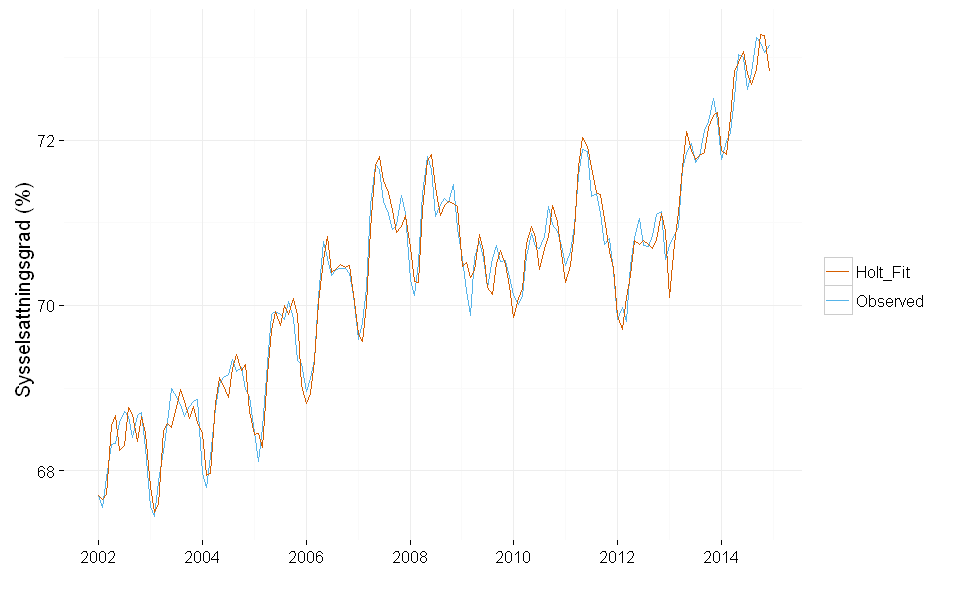

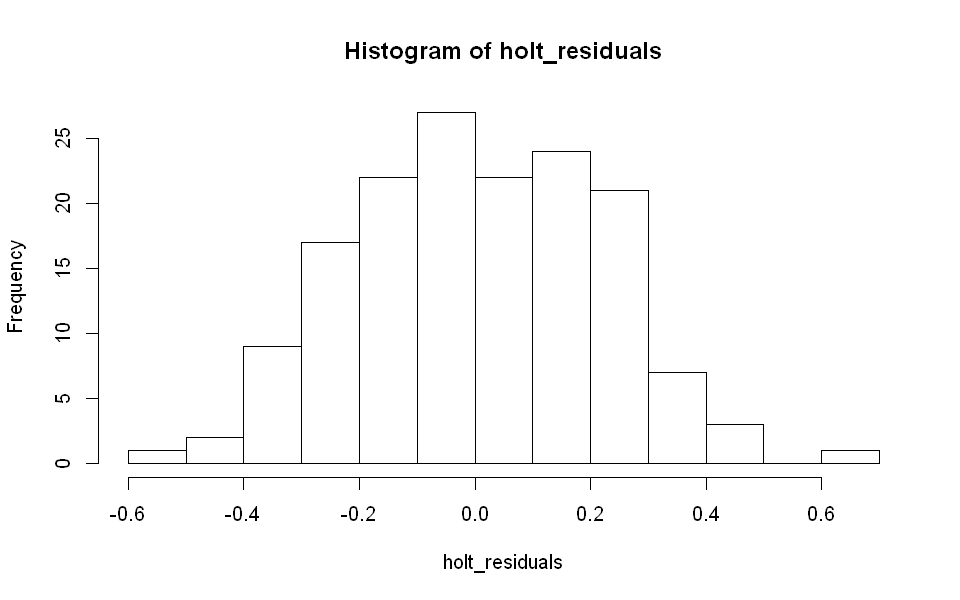

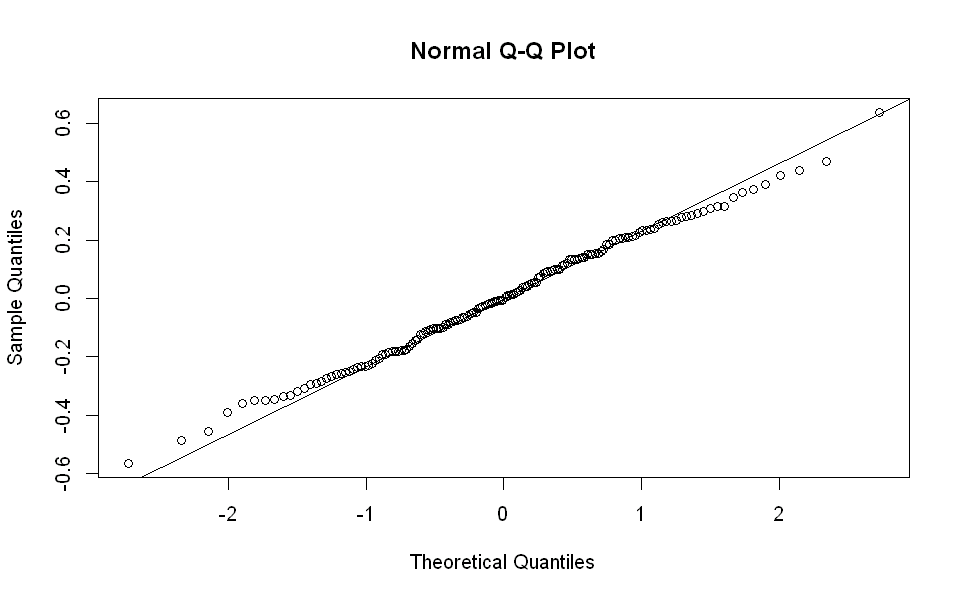

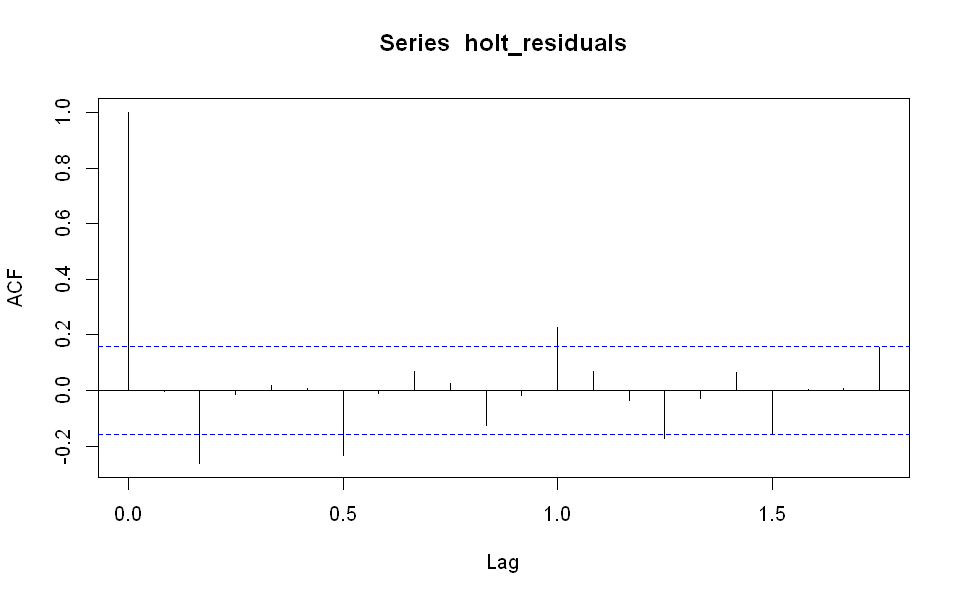

In [9]:
holt_residuals <- jp_data$Value - (jp_data$Holt_Fit + jp_data$Seasonal_comp)

durbinWatsonTest(as.numeric(holt_residuals))

temp_data <- data.frame(Date = jp_data$Date, Value = jp_data$Value, Fitted = (jp_data$Holt_Fit + jp_data$Seasonal_comp))

ggplot(temp_data, aes()) +
  geom_line(aes(x = Date, y = Value, color="Observed")) +
  geom_line(aes(x = Date, y = Fitted, color="Holt_Fit")) +
  scale_colour_manual(name="", values=c(Observed="#56B4E9", Holt_Fit="#D55E00")) +
  theme_bw() +
  theme(plot.background = element_blank(), 
    panel.border = element_blank(),
    axis.line = element_line(color = 'black'),
    panel.grid.major.x = element_line(colour = "grey93"),
    panel.grid.major.y = element_line(colour = "grey93"),
    axis.title.y = element_text(hjust = 0.45, vjust = 1.05)) +
  ylab("Sysselsattningsgrad (%)") +
  xlab("")


hist(holt_residuals)
qqnorm(holt_residuals)
qqline(holt_residuals)
acf(holt_residuals)

Prognos 12 månader framåt

Warning message:
: Removed 12 rows containing missing values (geom_path).Warning message:
: Removed 12 rows containing missing values (geom_path).Warning message:
: Removed 156 rows containing missing values (geom_path).

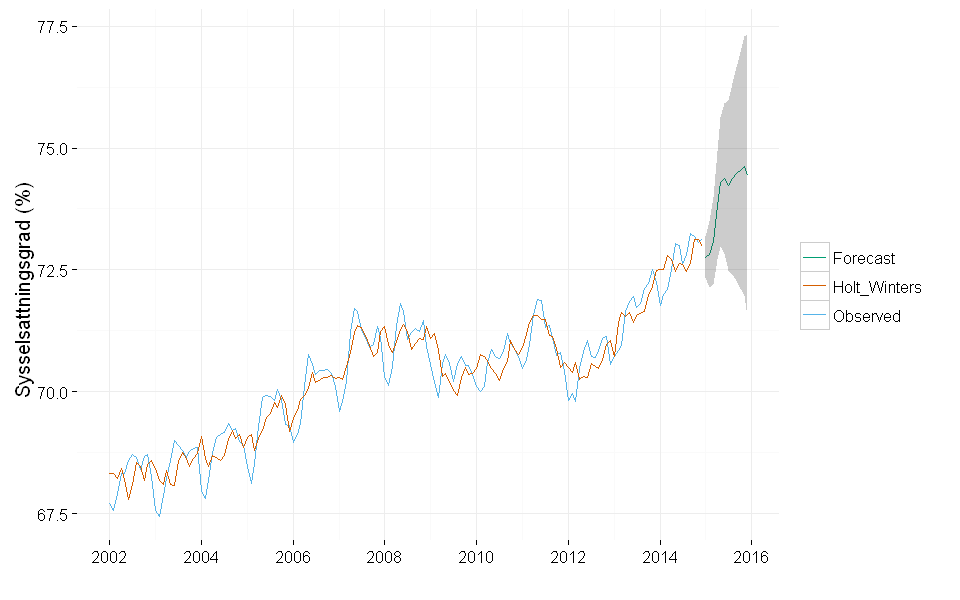

In [10]:
forecast_mean <- jp_holt_model$mean + jp_data$Seasonal_comp[1:12]
forecast_low <- jp_holt_model$lower[,2] + jp_data$Seasonal_comp[1:12]
forecast_high <- jp_holt_model$upper[,2] + jp_data$Seasonal_comp[1:12]

predict_data <- data.frame(Date = c(jp_data$Date, seq(as.Date("2015-01-01"), by = "month", length.out = 12)),
                           Value = c(jp_data$Value, rep(NA, 12)),
                           Holt = c(as.numeric(jp_holt_model$fitted), rep(NA, 12)),
                           Forecast = c(rep(NA, 156), forecast_mean),
                           forecast_high = c(rep(NA, 156), forecast_high),
                           forecast_low = c(rep(NA, 156), forecast_low))
#predict_data

ggplot(predict_data, aes()) +
  geom_line(aes(x = Date, y = Value, color="Observed")) +
  geom_line(aes(x = Date, y = Holt, color="Holt_Winters")) +
  geom_line(aes(x = Date, y = Forecast, color="Forecast")) +
  geom_ribbon(aes(x = Date, ymin=forecast_low, ymax=forecast_high), alpha=.25) +
  scale_colour_manual(name="", values=c(Observed="#56B4E9", Forecast="#009E73", Holt_Winters="#D55E00" )) +
  theme_bw() +
  theme(plot.background = element_blank(), 
    panel.border = element_blank(),
    axis.line = element_line(color = 'black'),
    panel.grid.major.x = element_line(colour = "grey93"),
    panel.grid.major.y = element_line(colour = "grey93"),
    axis.title.y = element_text(hjust = 0.45, vjust = 1.05)) +
  ylab("Sysselsattningsgrad (%)") +
  xlab("")

In [11]:
holt_forecast <- data.frame(Date = seq(as.Date("2015-01-01"), by = "month", length.out = 12),
                           Low_95 = forecast_low,
                           Mean = forecast_mean,
                           High_95 = forecast_high)

holt_forecast

,Date,Low_95,Mean,High_95
1,2015-01-01,72.33981,72.76048,73.18116
2,2015-02-01,72.14494,72.81834,73.49175
3,2015-03-01,72.19841,73.09302,73.98763
4,2015-04-01,72.72184,73.82886,74.93588
5,2015-05-01,72.98222,74.30014,75.61806
6,2015-06-01,72.84612,74.37667,75.90722
7,2015-07-01,72.48998,74.23654,75.98309
8,2015-08-01,72.39954,74.36638,76.33322
9,2015-09-01,72.27571,74.46765,76.6596
10,2015-10-01,72.11189,74.53405,76.9562
